# Salary Analysis for Data Scientists in Data Science

Analyzing salaries is a crucial aspect of understanding the compensation landscape for data scientists in the field of data science. By examining salary data, we can gain insights into the factors that influence earning potential, such as experience, education, location, and industry. Salary analysis helps organizations attract and retain top talent by offering competitive compensation packages. It also enables data scientists to benchmark their own salaries and negotiate better terms. By leveraging statistical techniques and data visualization, we can uncover trends, patterns, and outliers in salary data, providing valuable information for decision-making and strategic planning. Salary analysis plays a vital role in ensuring fair compensation practices and promoting transparency within the data science community.


# Data Understanding

## Importing Libraires

In [13]:
import pandas as pd
import numpy as np
import matplotlib as plt

## Read the csv file into a pandas dataframe &  Display the first 5 rows of the dataframe

In [14]:
df = pd.read_csv('DataScienceSalaries.csv')     
df.head()                                    

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


## No of Rows and Columns in DataSet


In [15]:
df.shape

(3755, 11)

## Index of DataSet


In [16]:
df.index

RangeIndex(start=0, stop=3755, step=1)

# Data Visualization

## Columns and Data Type of Columns in The Data


In [17]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

## Unique Job Titles in the Data 

In [18]:
df['job_title'].unique()    

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

## No of Unique Job Titles in the Data

In [19]:
df['job_title'].nunique()   


93

## Job Title Counts

In [20]:
def get_job_title_counts(df):
    """
    Returns the count of each job title in the given DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the job titles.

    Returns:
    pandas.Series: A Series object with the count of each job title.
    """
    df['job_title'] = df['job_title'].str.lower()
    return df['job_title'].value_counts()
get_job_title_counts(df)


job_title
data engineer                          1040
data scientist                          840
data analyst                            612
machine learning engineer               289
analytics engineer                      103
                                       ... 
principal machine learning engineer       1
azure data engineer                       1
manager data management                   1
marketing data engineer                   1
finance data analyst                      1
Name: count, Length: 93, dtype: int64

# Data Prepration

## Grouping the Data by Job Title and Calculating the Mean Salary of Each Job Title


In [21]:
df.groupby('job_title')['salary'].mean()

job_title
3d computer vision researcher    120000.000000
ai developer                     137181.818182
ai programmer                     55000.000000
ai scientist                     275312.500000
analytics engineer               151352.621359
                                     ...      
research engineer                162752.810811
research scientist               160768.890244
software data engineer            75000.000000
staff data analyst                15000.000000
staff data scientist             105000.000000
Name: salary, Length: 93, dtype: float64

## Dropping the Salary and Salary Currency Columns

In [22]:
df = df.drop(['salary', 'salary_currency'], axis=1) 
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,principal data scientist,85847,ES,100,ES,L
1,2023,MI,CT,ml engineer,30000,US,100,US,S
2,2023,MI,CT,ml engineer,25500,US,100,US,S
3,2023,SE,FT,data scientist,175000,CA,100,CA,M
4,2023,SE,FT,data scientist,120000,CA,100,CA,M


## Replace the values in the 'experience_level' column with corresponding labels:
### 'SE' -> 'Senior Level/Expert'
### 'MI' -> 'Medium Level/Intermediate'
### 'EN' -> 'Entry Level'
### 'EX' -> 'Executive Level'

In [23]:

df['experience_level'] = df['experience_level'].replace({'SE': 'Senior Level/Expert', 'MI': 'Medium Level/Intermediate', 'EN': 'Entry Level', 'EX': 'Executive Level'})     

df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior Level/Expert,FT,principal data scientist,85847,ES,100,ES,L
1,2023,Medium Level/Intermediate,CT,ml engineer,30000,US,100,US,S
2,2023,Medium Level/Intermediate,CT,ml engineer,25500,US,100,US,S
3,2023,Senior Level/Expert,FT,data scientist,175000,CA,100,CA,M
4,2023,Senior Level/Expert,FT,data scientist,120000,CA,100,CA,M


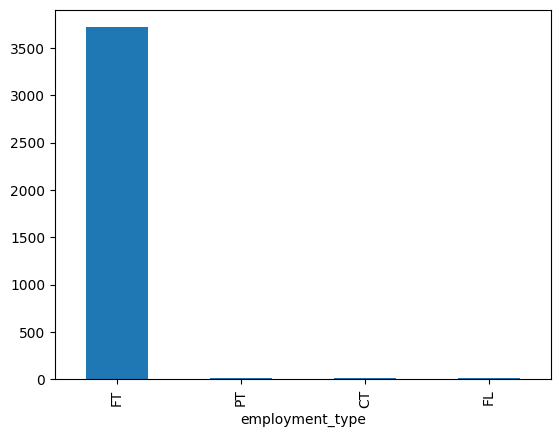

In [24]:
# Plotting the count of each job title
df['employment_type'].value_counts().plot(kind='bar');
